# Inception Model for image classification with weights
## Pre-trained on ImageNet.

In [95]:
from PIL import Image
from keras.preprocessing import image
import keras.applications.inception_v3 as inception_v3
import numpy as np
import requests
from IPython.display import display # to display images
import pprint

In [ ]:
!mkdir -p ~/.keras/models/
!cp ../input/inceptionv3/imagenet_class_index.json ~/.keras/models/

In [83]:
inception_model = inception_v3.InceptionV3(weights='imagenet')
MODEL_INPUT_SIZE_DEFAULT = (299, 299)

In [122]:
def classify_inception(inception_model, img, target_size=MODEL_INPUT_SIZE_DEFAULT, top=5):
    """Classify image and return top match."""
    if img.size != target_size:
        print('resizing img..')
        img = img.resize(target_size)
    print(img.size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = inception_v3.preprocess_input(x)
    preds = inception_model.predict(x)
    return inception_v3.decode_predictions(preds, top=top)

## Download image

In [115]:
def download_image(query_or_url, img_path):
    """ Download an image from a url, or query. """
    url = None
    if any([query_or_url.startswith(protocol) for protocol in ['http','https']]):
        url = query_or_url
    else:
        query = query_or_url
        url = "https://source.unsplash.com/1600x900/?{}".format(query)
    
    r = requests.get(url)
    if r.url != url:
        url_img = r.url # after redirect
        print(url_img)
        r = requests.get(url_img)

    if r.status_code == 200:
        print('success, writing file: {}'.format(fpath))
        with open(img_path, 'wb') as f:
            f.write(r.content)

In [118]:
query = 'animal'
url = "https://images.unsplash.com/photo-1533082546116-1dc948fc4be4?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1600&h=900&fit=crop&ixid=eyJhcHBfaWQiOjF9"
img_path = '/tmp/img.png'

download_image(query, img_path)
#download_image(url, img_path)

https://images.unsplash.com/photo-1557431518-1f8e3d83c2b0?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1600&h=900&fit=crop&ixid=eyJhcHBfaWQiOjF9
success, writing file: /tmp/img.png


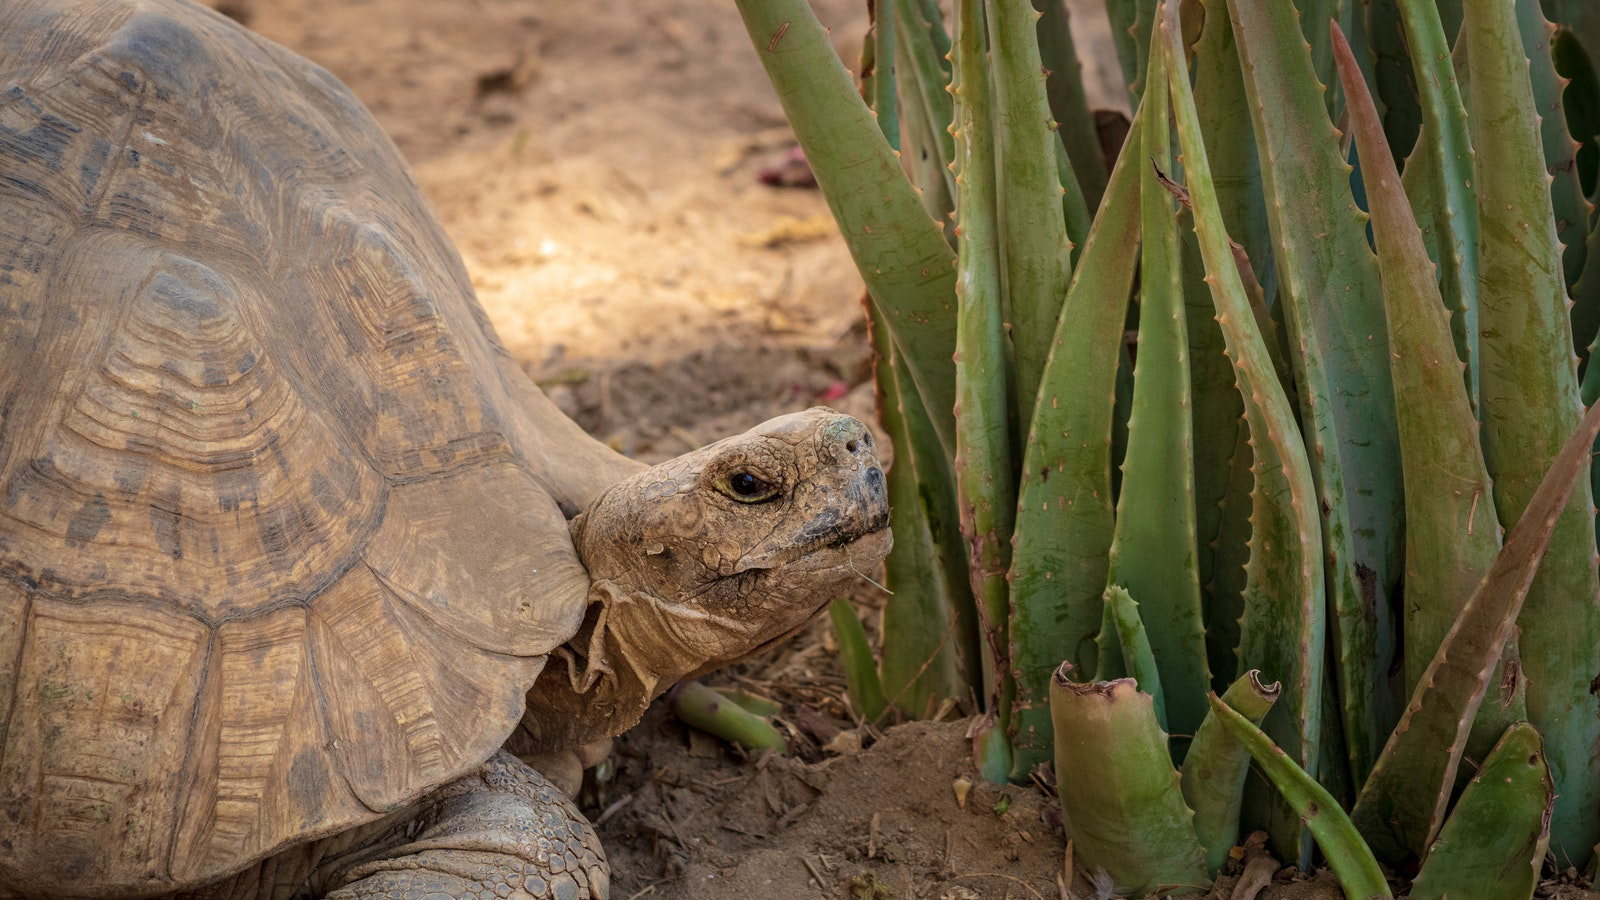

In [119]:
img = Image.open(img_path)
display(img)

## Classify image content

In [124]:
res = classify_inception(inception_model, img)

resizing img..
(299, 299)


In [125]:
pprint.pprint(res)

[[('n01669191', 'box_turtle', 0.87475586),
  ('n01667778', 'terrapin', 0.06807315),
  ('n01667114', 'mud_turtle', 0.0234017),
  ('n01664065', 'loggerhead', 0.00034235368),
  ('n01665541', 'leatherback_turtle', 0.00028726758)]]
